# Examples usage of logistic regression classifier on a MNIST data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
from miniml import load_mnist
from miniml import LogisticRegressionClassifier

In [3]:
mnist_path: str = "/home/filip/Data/mnist"
train_images, train_labels = load_mnist("/home/filip/Data/mnist", "train")
test_images, test_labels = load_mnist("/home/filip/Data/mnist", "test")

train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

In [4]:
from numpy.random import RandomState
rnd = RandomState(42)

In [5]:
def sample(X, y, n):
    indices = rnd.choice(X.shape[0], n)
    return X[indices], y[indices]

In [6]:
train_sample, y_train_sample = sample(train_images, train_labels, 10000)

train_sample /= 255
test_images /= 255

In [7]:
def predict(model, test_images, batch_size=256):
    n_batches = test_images.shape[0] // batch_size
    if test_images.shape[0] % batch_size != 0:
        n_batches += 1

    y_pred = np.empty(test_images.shape[0])
    for i in tqdm(range(n_batches)):
        start = i * batch_size
        end = start + batch_size
        y_pred[start:end] = model.predict(test_images[start:end])
    return y_pred

In [8]:
lr = LogisticRegressionClassifier(batch_size=64, n_epochs=500)
lr.fit(train_sample, y_train_sample)

In [9]:
y_pred = predict(lr, test_images)
print(np.mean(y_pred == test_labels))

100%|██████████| 40/40 [00:00<00:00, 1043.04it/s]

0.8784


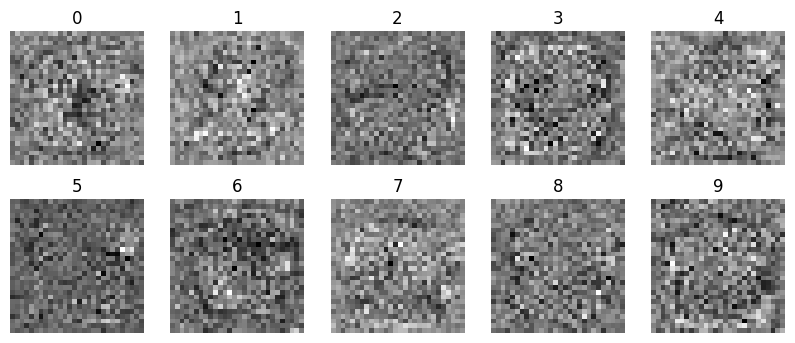

In [10]:
# Plot the weights of the model.
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(lr.W[i].reshape(28, 28), cmap="gray")
    ax.set_title(i)
    ax.axis("off")
plt.show()

In [11]:
lr = LogisticRegressionClassifier(batch_size=64, n_epochs=500, weight_decay=0.95)
lr.fit(train_sample, y_train_sample)

In [12]:
y_pred = predict(lr, test_images)
print(np.mean(y_pred == test_labels))

100%|██████████| 40/40 [00:00<00:00, 1757.81it/s]

0.8779


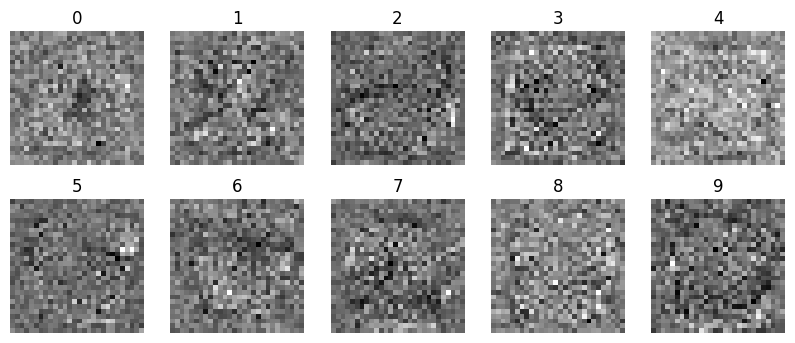

In [13]:
# Plot the weights of the model.
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(lr.W[i].reshape(28, 28), cmap="gray")
    ax.set_title(i)
    ax.axis("off")
plt.show()